# SAMPLE development Colab for T5 fine-tuning on InstructAware Vision System signage -> informative (instructive) narrative


*   Colab for development of all necessary code - dataset loading+prep , T5 model loading, fine-tuning (w/ parameter specification), evaluation - both metrics and testing reulsts.
*   SAMPLE/DEV ONLY as working on small dataset



## STEP 1: import and install necessary packages

In [ ]:
import torch
print(torch.__version__)  # Ensure it's correctly installed

2.5.1+cu124


transformers: This is a library developed by Hugging Face that provides pre-trained models, tokenizers, and other tools for working with Natural Language Processing (NLP) tasks. It's crucial for using the T5 model, which is a transformer-based model.

datasets: Also from Hugging Face, this library helps you easily access, download, and process various datasets commonly used in NLP. It simplifies dataset loading and manipulation.

nltk: (Natural Language Toolkit) is a comprehensive library for text processing, including tokenization, stemming, tagging, parsing, and more. It's used for various basic NLP operations.

bert-score: This library implements the BERTScore metric, which assesses the similarity between two texts using contextualized embeddings from BERT (Bidirectional Encoder Representations from Transformers). It's used for evaluating the quality of generated text.

unbabel-comet: This library provides tools for using COMET (Cross-lingual Optimization Metric for Evaluation of Translation), a neural framework for evaluating machine translation and other text generation tasks.

In [ ]:
!pip install transformers datasets nltk bert-score unbabel-comet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install tensorflow


###Step 2 : Installation of BLUERT

**Explanation of the Code:**

**!git clone https://github.com/google-research/bleurt.git**

This command clones the BLEURT repository from GitHub into your local environment.
GitHub Link (https://github.com/google-research/bleurt.git):
This is the official repository for BLEURT (Bilingual Evaluation Understudy with Representations from Transformers), developed by Google Research. BLEURT is an evaluation metric for natural language generation (NLG) tasks, such as machine translation and text summarization. It leverages pre-trained language models to assess the quality of generated text by comparing it with reference text.

**%cd bleurt**

This changes the current working directory to the bleurt folder that was just cloned.

**!pip install .**

This installs the BLEURT package from the local directory (denoted by the .).
It reads the setup.py file inside the BLEURT directory to install the necessary dependencies and make BLEURT available for use in your Python environment.

In [ ]:
!git clone https://github.com/google-research/bleurt.git
%cd bleurt
!pip install .

Cloning into 'bleurt'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 134 (delta 0), reused 17 (delta 0), pack-reused 116 (from 1)
Receiving objects: 100% (134/134), 31.28 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/bleurt
Processing /content/bleurt
  Preparing metadata (setup.py) ... done
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456764 sha256=86c4d1c1edc53305254f688cf7a71568579280cb03ea56c5a24786a0bfbab0ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-_eocu26o/wheels/49/ab/73/9318ab38d4cd1c732bcea8335d3f8d7c0316c8d07b9084fa85
Successfully built BLEURT




**!wget https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip**

This command uses wget to download a file from the provided URL.
What’s being downloaded?
The file BLEURT-20.zip contains pre-trained BLEURT models and resources needed to evaluate natural language generation tasks.
Source:
The link points to a Google Cloud Storage bucket (https://storage.googleapis.com/bleurt-oss-21/) hosted by Google Research, providing official BLEURT model files.

**!unzip BLEURT-20.zip**

This command extracts the contents of the BLEURT-20.zip file into your working directory.

What’s inside?

The extracted files usually include:
Pre-trained BLEURT model weights (used for evaluating text similarity).
Configuration files necessary to load and use the BLEURT models in your evaluation pipeline.

In [ ]:
!wget https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip
!unzip BLEURT-20.zip


--2025-01-31 00:04:59--  https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2140294207 (2.0G) [application/octet-stream]
Saving to: ‘BLEURT-20.zip’

BLEURT-20.zip       100%[===================>]   1.99G  35.3MB/s    in 86s     

2025-01-31 00:06:26 (23.7 MB/s) - ‘BLEURT-20.zip’ saved [2140294207/2140294207]

Archive:  BLEURT-20.zip
   creating: BLEURT-20/
  inflating: BLEURT-20/bert_config.json  
  inflating: BLEURT-20/saved_model.pb  
   creating: BLEURT-20/variables/
  inflating: BLEURT-20/variables/variables.index  
  inflating: BLEURT-20/variables/variables.data-00000-of-00001  
  inflating: BLEURT-20/sent_piece.vocab  
  inflating: BLEURT-20/bleurt_config.json  
  inflating: BLEURT-20/sent_piece.model  


In [ ]:
import torch

print("Torch Version:", torch.__version__)  # Should print 2.5.1+cu124
print("CUDA Available:", torch.cuda.is_available())  # Should return True if GPU is enabled
print("CUDA Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")  # GPU Name


Torch Version: 2.5.1+cu124
CUDA Available: True
CUDA Device: NVIDIA A100-SXM4-40GB


**!pip install datasets**

This command installs the datasets library from the Python Package Index (PyPI) into your environment.
The datasets library is developed by Hugging Face and provides easy access to a wide range of pre-built datasets for machine learning, especially in Natural Language Processing (NLP) tasks.

In [ ]:
!pip install datasets

# With T5- *Base* and BlueRT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#T5Tokenizer:

A tokenizer specific to the T5 model (Text-to-Text Transfer Transformer). It converts raw text into tokens that can be processed by the model.
Usage: Converts your input narratives and text into a numerical format that the T5 model can understand.

#T5ForConditionalGeneration:

This loads the T5 model for tasks like text summarization, translation, and text generation.
Usage: Generates narratives based on OCR text or other inputs, making it ideal for tasks that require transforming one sequence of text into another.

#Seq2SeqTrainer:

A high-level trainer specifically designed for sequence-to-sequence (Seq2Seq) tasks, such as translation or summarization.
Usage: Simplifies the training process by handling model optimization, evaluation, and data loading under the hood.

#Seq2SeqTrainingArguments:

Defines hyperparameters and settings for the training process (like learning rate, batch size, number of epochs, etc.).
Usage: Customize how your model is trained, including how often to evaluate and save checkpoints.

#DataCollatorForSeq2Seq:

A data collator designed for sequence-to-sequence tasks, ensuring that batches of data are properly padded and formatted during training.
Usage: Automatically handles padding of sequences to ensure they have the same length in a batch, which is necessary for efficient training.

#from bleurt import score:

BLEURT is an evaluation metric for natural language generation tasks. It assesses the quality of generated text by comparing it to reference text, using a pre-trained model to understand context and semantics.

In [ ]:
import pandas as pd
import ast
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq,
)
import torch
from collections import Counter

# Step 1: Normalize Bounding Boxes to scale coordinates between 0 and 1:
**def normalize_bbox(bbox, image_width=2880, image_height=1800)::** Defines a function named normalize_bbox that takes a bounding box string (bbox) as input and normalizes the coordinates. It assumes an image width of 2880 and height of 1800 by default.

**bbox = ast.literal_eval(bbox):** Converts the bounding box string to a list of integers using ast.literal_eval.

**x_min, y_min, x_max, y_max = bbox:** Extracts the bounding box coordinates.


**return [...]:** Returns the normalized coordinates, scaling them to a range of 0 to 1.


**data['Normalized BBox'] = data['Bounding Box'].apply(normalize_bbox):** This line applies the normalize_bbox function to the 'Bounding Box' column of the data DataFrame and creates a new column called 'Normalized BBox' to store the normalized bounding box coordinates.

In [ ]:
# Load dataset
file_path = '/content/updated_data.csv'  # Update path
data = pd.read_csv(file_path)

'''
# Step 1: Normalize Bounding Boxes to scale coordinates between 0 and 1
# This function converts bounding box string representations to normalized coordinates based on image dimensions
def normalize_bbox(bbox, image_width=2880, image_height=1800):
    bbox = ast.literal_eval(bbox)  # Convert bounding box string to a list of integers
    x_min, y_min, x_max, y_max = bbox  # Extract the coordinates for the bounding box
    return [
        x_min / image_width,  # Normalize x_min relative to image width
        y_min / image_height,  # Normalize y_min relative to image height
        (x_max - x_min) / image_width,  # Normalize width of bounding box
        (y_max - y_min) / image_height,  # Normalize height of bounding box
    ]
'''

data['Normalized BBox'] = data['bounding box']


# Step 2: Group Data: This is a comment marking the start of the data grouping step.

**grouped_data = data.groupby('Original Filename').agg({...}).reset_index():** This line performs the actual grouping of the data. Let's break it down:

**data.groupby('Original Filename'):** Groups the data in the data DataFrame based on the 'Original Filename' column. This means all rows with the same filename will be grouped together.

**.agg({...}):** Applies aggregation functions to the grouped data. Here's what each function does:

**'OCR TEXT': lambda x: list(x):** Creates a list of all the OCR text values within each group (for each unique filename).

**'Normalized BBox': lambda x: list(x):** Creates a list of all the normalized bounding box values within each group.

**'Narrative 1': 'first':** Takes the first value of 'Narrative 1' within each group (assuming all rows for a file have the same narrative).

**.reset_index():** Resets the index of the resulting DataFrame to consecutive integers, making it easier to work with.

In [ ]:
# Step 2: Group Data
grouped_data = data.groupby('filename').agg({
    'damage level': lambda x: list(x),
    'bounding box': lambda x: list(x),
    'narrative 3': 'first',
}).reset_index()


# Step 3: Prepare Input Text for T5: A comment indicating this section prepares input for the T5 model.

**def create_input_text(row)::** Defines a function named create_input_text that takes a row of the grouped_data DataFrame as input.

**ocr_bbox_pairs = [...]:** This line creates a list of strings, where each string represents an OCR text and its corresponding normalized bounding box, formatted as "OCR_text":[normalized_bounding_box].

**return f"OCR-BBox Pairs: {{ {', '.join(ocr_bbox_pairs)} }}":** This line returns a formatted string that combines the OCR-bbox pairs into a single input text for the T5 model.

**grouped_data['input_text'] = grouped_data.apply(create_input_text, axis=1):** Applies the create_input_text function to each row of the grouped_data DataFrame, creating a new column called 'input_text' to store the formatted input text for the T5 model.

**grouped_data['output_text'] = grouped_data['Narrative 1']:** Creates a new column named 'output_text' and copies the values from the 'Narrative 1' column. This column will contain the target narratives for the model to learn.

**grouped_data = grouped_data.dropna(subset=['output_text']):** This line removes any rows from the grouped_data DataFrame where the 'output_text' column has missing values (NaN). This ensures that the dataset used for training and evaluation does not contain any incomplete or invalid data.

In [ ]:
# Step 3: Prepare Input Text for T5
def create_input_text(row):
    damage_bbox_pairs = [
        f'"{damage}": {bbox}' for damage, bbox in zip(row['damage level'], row['bounding box'])
    ]
    return f"damage-BBox Pairs: {{ {', '.join(damage_bbox_pairs)} }}"

grouped_data['input_text'] = grouped_data.apply(create_input_text, axis=1)
grouped_data['output_text'] = grouped_data['narrative 3']
grouped_data = grouped_data.dropna(subset=['output_text'])

# Step 4: Convert to Hugging Face Dataset: A comment indicating that this section converts the data to a Hugging Face Dataset.

**hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']].reset_index(drop=True)):** This line converts the grouped_data DataFrame, specifically the 'input_text' and 'output_text' columns, into a Hugging Face Dataset object named hf_dataset.


**reset_index(drop=True)** is used to reset the index of the DataFrame and drop the old index. This is done to avoid potential index-related issues when converting to a Hugging Face Dataset.


**hf_dataset = hf_dataset.train_test_split(test_size=0.2):** This line splits the hf_dataset into training and testing sets. test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.

# Step 5: Tokenization: A comment indicating this section focuses on tokenization.

**tokenizer = T5Tokenizer.from_pretrained("t5-base"):** This line loads the pre-trained tokenizer for the T5-base model using T5Tokenizer.from_pretrained. The tokenizer is responsible for converting text into numerical tokens that the T5 model can understand.


**def preprocess_function(examples)::** This line defines a function called preprocess_function that takes a batch of examples (a dictionary with keys like 'input_text' and 'output_text') as input. This function will be used to tokenize and prepare the data for training.


**inputs = tokenizer(examples['input_text'], max_length=512, truncation=True, padding="max_length"):** Tokenizes the input text (examples['input_text']) using the loaded tokenizer. It sets a maximum sequence length of 512 tokens and truncates longer sequences. It also pads shorter sequences to the maximum length for consistent input size.


**outputs = tokenizer(examples['output_text'], max_length=128, truncation=True, padding="max_length"):** Tokenizes the output text (examples['output_text']) with a maximum sequence length of 128 tokens, truncation, and padding.


**inputs['labels'] = outputs['input_ids']:** Adds the tokenized output (the input_ids from the output tokenizer) as labels to the inputs dictionary. This is how the model learns to map input to output during training.


**return inputs:** Returns the modified inputs dictionary, which now contains the tokenized input and the corresponding tokenized output as labels.


**tokenized_dataset = hf_dataset.map(preprocess_function, batched=True):** Applies the preprocess_function to the hf_dataset using the map method. batched=True indicates that the function will be applied to batches of data for efficiency. This step tokenizes the entire dataset, preparing it for model training.

In [ ]:
# Step 4: Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']].reset_index(drop=True))
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

# Step 5: Tokenization
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def preprocess_function(examples):
    inputs = tokenizer(examples['input_text'], max_length=512, truncation=True, padding="max_length")
    outputs = tokenizer(examples['output_text'], max_length=128, truncation=True, padding="max_length")
    inputs['labels'] = outputs['input_ids']
    return inputs

tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/927 [00:00<?, ? examples/s]

Map:   0%|          | 0/232 [00:00<?, ? examples/s]

# Step 6: Load T5 Model: This is a comment indicating the purpose of the code below.

**model = T5ForConditionalGeneration.from_pretrained("t5-base"):** This line loads the pre-trained T5 model for conditional generation.

**T5ForConditionalGeneration:** This is the specific T5 model architecture designed for tasks like text generation, translation, and summarization.

**from_pretrained("t5-base"):** This function downloads and loads the pretrained t5-base model

**training_args = Seq2SeqTrainingArguments(...):** This line defines the training arguments using the Seq2SeqTrainingArguments class from the transformers library. These arguments control how the model will be trained. Let's break down the key arguments:

**output_dir="./t5-finetuned":** Specifies the directory where the trained model and checkpoints will be saved.

**evaluation_strategy="epoch":** Sets the evaluation strategy to "epoch," meaning the model will be evaluated at the end of each training epoch.


**learning_rate=3e-5:** Sets the initial learning rate for the optimizer.


**per_device_train_batch_size=4:** Specifies the batch size per device during training.


**per_device_eval_batch_size=4:** Specifies the batch size per device during evaluation.


**weight_decay=0.01:** Sets the weight decay for regularization, helping to prevent overfitting.


**save_total_limit=3:** Limits the total number of checkpoints saved to prevent excessive disk usage.


**num_train_epochs=15:** Specifies the total number of training epochs.


**predict_with_generate=True:** Enables generation during prediction.


**logging_dir="./logs":** Specifies the directory for storing training logs.


**logging_steps=len(tokenized_dataset['train']) // 4:** Sets the logging frequency based on the training dataset size.


**gradient_accumulation_steps=2:** Accumulates gradients over multiple steps before updating model weights, which can be helpful for larger batch sizes or limited GPU memory.


**fp16=True:** Enables mixed precision training (FP16) for potential speedup and memory efficiency.

# Step 7: Train the Model: This comment indicates the start of the model training phase.

**trainer = Seq2SeqTrainer(...):** Creates a Seq2SeqTrainer instance, which is responsible for managing the training process. The arguments passed to the trainer include:

**model=model:** The T5 model that was loaded earlier.

**args=training_args:** The training arguments defined in the previous cell.

**train_dataset=tokenized_dataset['train']:** The training dataset.

**eval_dataset=tokenized_dataset['test']:** The evaluation dataset.

**tokenizer=tokenizer:** The T5 tokenizer.

**data_collator=data_collator:** The data collator for batching data.

**trainer.train():** Starts the training process. This will train the T5 model on the training data for the specified number of epochs, evaluate it on the evaluation data at intervals defined by the evaluation_strategy, and save checkpoints according to the save_strategy.

**model.save_pretrained('./t5-finetuned'):** Saves the fine-tuned T5 model to the specified directory (./t5-finetuned). This includes saving the model's weights and configuration.


**tokenizer.save_pretrained('./t5-finetuned'):** Saves the tokenizer to the same directory. This ensures that the tokenizer used during training is also available when loading the model for inference later.

In [ ]:
# Step 6: Load T5 Model
model = T5ForConditionalGeneration.from_pretrained("t5-base")
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-finetuned",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=len(tokenized_dataset['train']) // 4,
    gradient_accumulation_steps=2,
    fp16=True,
)

# Step 7: Train the Model
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()
model.save_pretrained('./t5-finetuned')
tokenizer.save_pretrained('./t5-finetuned')



model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-edbfffb3043a>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ysekaran (ysekaran-california-state-university-east-bay) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


('./t5-finetuned/tokenizer_config.json',
 './t5-finetuned/special_tokens_map.json',
 './t5-finetuned/spiece.model',
 './t5-finetuned/added_tokens.json')

**def predict_all(dataset, model, tokenizer)::** This defines a function called predict_all that takes the dataset, model, and tokenizer as input. This function is responsible for generating predictions for all samples in the dataset.


**predictions = []:** Initializes an empty list to store the predictions.

**for sample in dataset::** Iterates through each sample in the dataset.

**input_text = sample['input_text']:** Extracts the input text from the current sample.

**tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True):** Tokenizes the input text using the tokenizer.

**return_tensors="pt":** Specifies that the tokenized input should be returned as PyTorch tensors.

**max_length=512:** Sets the maximum sequence length for the input.

**truncation=True:** Enables truncation if the input exceeds the maximum length.

**tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}:** Moves the tokenized input tensors to the specified device (GPU or CPU).

**outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True):** Generates the output sequence using the model's generate method.
tokenized_input["input_ids"]: Provides the input token IDs to the model.

**max_length=128:** Sets the maximum length for the generated output.

**num_beams=5:** Uses beam search with 5 beams for better generation quality.

**early_stopping=True:** Enables early stopping to potentially reduce generation time.

**predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True):** Decodes the generated output tokens back into human-readable text using the tokenizer.

**outputs[0]:** Selects the first generated sequence (from beam search).

**skip_special_tokens=True:** Removes special tokens (like start and end tokens) from the decoded text.

**predictions.append(...):** Appends a dictionary containing the input text, predicted narrative, and actual output text to the predictions list.

**return predictions:** Returns the list of predictions.

In [ ]:
# Step 8: Make Predictions
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def predict_all(dataset, model, tokenizer):
    predictions = []
    for sample in dataset:
        input_text = sample['input_text']
        tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
        tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}
        outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True)
        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append({"input_text": input_text, "predicted_narrative": predicted_text, "output_text": sample['output_text']})
    return predictions

test_predictions = predict_all(hf_dataset['test'], model, tokenizer)
predictions_df = pd.DataFrame(test_predictions)
predictions_df.to_csv("predicted_narratives.csv", index=False)

print("Predictions saved to predicted_narratives.csv ✅")

Predictions saved to predicted_narratives.csv ✅


In [ ]:
predictions_df.head(10)

input_text  \
0  damage-BBox Pairs: { "1": [0.49921875, 0.30703...   
1  damage-BBox Pairs: { "1": [0.64296875, 0.53593...   
2  damage-BBox Pairs: { "2": [0.3359375, 0.564843...   
3  damage-BBox Pairs: { "1": [0.41875, 0.27890625...   
4  damage-BBox Pairs: { "2": [0.58359375, 0.28906...   
5  damage-BBox Pairs: { "1": [0.73671875, 0.61562...   
6  damage-BBox Pairs: { "1": [0.47578125, 0.34921...   
7  damage-BBox Pairs: { "4": [0.57734375, 0.48125...   
8  damage-BBox Pairs: { "2": [0.41640625, 0.56484...   
9  damage-BBox Pairs: { "1": [0.25625, 0.35625, 0...   

                                 predicted_narrative  \
0  Ahead of you, there's a moderate crack in the ...   
1  Ahead of you, there are some moderate cracks i...   
2  Ahead of you, there are some moderate cracks i...   
3  Ahead of you, there are some moderate cracks i...   
4  Ahead of you, there's moderate sidewalk damage...   
5  Ahead of you, there are some moderate cracks i...   
6  Ahead of you, there's a moderate crack in the ...   
7  Ahead of you, there's moderate sidewalk damage...   
8  Ahead of you, there's moderate sidewalk damage...   
9  Ahead of you, there are some moderate cracks i...   

                                         output_text  
0  Ahead of you, the sidewalk displays minor crac...  
1  Ahead of you, there are some minor cracks in t...  
2  Ahead of you, there's moderate sidewalk damage...  
3  I notice some minor cracks on the sidewalk dir...  
4  To your right, there is moderate sidewalk dama...  
5  Ahead of you, the sidewalk has some cracks tha...  
6  It looks like there is minor damage on the sid...  
7  Ahead, there is significant sidewalk damage wi...  
8  Ahead, you’ll notice moderate sidewalk damage,...  
9  There's some minor sidewalk damage ahead of yo...

### BELOW IS THE COMBINED CODE

In [ ]:
import pandas as pd
import ast
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq,
)
import torch
from collections import Counter
from bleurt import score

# Load dataset
file_path = '/content/drive/MyDrive/InstructAware/metrics_Colab/Narrative_dataset_File.csv'  # Update path
data = pd.read_csv(file_path)

# Step 1: Normalize Bounding Boxes
def normalize_bbox(bbox, image_width=2880, image_height=1800):
    bbox = ast.literal_eval(bbox)
    x_min, y_min, x_max, y_max = bbox
    return [
        x_min / image_width,
        y_min / image_height,
        (x_max - x_min) / image_width,
        (y_max - y_min) / image_height,
    ]

data['Normalized BBox'] = data['Bounding Box'].apply(normalize_bbox)

# Step 2: Group Data
grouped_data = data.groupby('Original Filename').agg({
    'OCR TEXT': lambda x: list(x),
    'Normalized BBox': lambda x: list(x),
    'Narrative 1': 'first',
}).reset_index()

# Step 3: Prepare Input Text for T5
def create_input_text(row):
    ocr_bbox_pairs = [
        f'"{ocr}": {bbox}' for ocr, bbox in zip(row['OCR TEXT'], row['Normalized BBox'])
    ]
    return f"OCR-BBox Pairs: {{ {', '.join(ocr_bbox_pairs)} }}"

grouped_data['input_text'] = grouped_data.apply(create_input_text, axis=1)
grouped_data['output_text'] = grouped_data['Narrative 1']
grouped_data = grouped_data.dropna(subset=['output_text'])

# Step 4: Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']].reset_index(drop=True))
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

# Step 5: Tokenization
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def preprocess_function(examples):
    inputs = tokenizer(examples['input_text'], max_length=512, truncation=True, padding="max_length")
    outputs = tokenizer(examples['output_text'], max_length=128, truncation=True, padding="max_length")
    inputs['labels'] = outputs['input_ids']
    return inputs

tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

# Step 6: Load T5 Model
model = T5ForConditionalGeneration.from_pretrained("t5-base")
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Step 7: Define Training Arguments
'''
output_dir (str): Directory to save model checkpoints and outputs.
overwrite_output_dir (bool, default=False): Overwrite the content of the output directory if it exists.
do_train (bool, default=False): Whether to run training.
do_eval (bool, default=False): Whether to run evaluation on the validation set.
do_predict (bool, default=False): Whether to run predictions on the test set.
evaluation_strategy (str or IntervalStrategy, default="no"): Evaluation strategy to adopt during training. Possible values are "no", "steps", or "epoch".
per_device_train_batch_size (int, default=8): Batch size per device during training.
per_device_eval_batch_size (int, default=8): Batch size per device during evaluation.
learning_rate (float, default=5e-5): Initial learning rate for the optimizer.
weight_decay (float, default=0.0): Weight decay to apply (if any).
adam_beta1 (float, default=0.9): Beta1 for the Adam optimizer.
adam_beta2 (float, default=0.999): Beta2 for the Adam optimizer.
adam_epsilon (float, default=1e-8): Epsilon for the Adam optimizer.
max_grad_norm (float, default=1.0): Maximum gradient norm for gradient clipping.
num_train_epochs (float, default=3.0): Total number of training epochs.
max_steps (int, default=-1): If set to a positive number, the total number of training steps to perform. Overrides num_train_epochs.
lr_scheduler_type (str or SchedulerType, default="linear"): The scheduler type to use.
warmup_steps (int, default=0): Number of steps for the warmup phase in the learning rate scheduler.
logging_dir (str, default="runs"): TensorBoard log directory.
logging_strategy (str or IntervalStrategy, default="steps"): Logging strategy to adopt during training. Possible values are "no", "steps", or "epoch".
logging_steps (int, default=500): Log every X updates steps.
save_strategy (str or IntervalStrategy, default="steps"): The checkpoint save strategy to adopt during training. Possible values are "no", "steps", or "epoch".
save_steps (int, default=500): Save checkpoint every X updates steps.
save_total_limit (int, default=None): Limit the total amount of checkpoints. Deletes the older checkpoints in the output directory.
no_cuda (bool, default=False): Whether to disable CUDA even when it is available.
seed (int, default=42): Random seed for initialization.
fp16 (bool, default=False): Whether to use 16-bit (mixed) precision training.
fp16_opt_level (str, default="O1"): Apex AMP optimization level for fp16 training.
local_rank (int, default=-1): For distributed training: local_rank.
tpu_num_cores (int, default=None): For TPU training: number of TPU cores.
dataloader_drop_last (bool, default=False): Drop the last incomplete batch if it is not divisible by the batch size.
eval_steps (int, default=None): Run an evaluation every X steps.
dataloader_num_workers (int, default=0): Number of subprocesses to use for data loading.
past_index (int, default=-1): If >=0, uses the corresponding part of the output as the past state for next step.
run_name (str, default=None): An optional descriptor for the run.
disable_tqdm (bool, default=None): Whether to disable the tqdm progress bar.
remove_unused_columns (bool, default=True): Remove columns not required by the model when using a dataset.
label_names (List[str], default=None): The list of keys in your dictionary of inputs that correspond to the labels.
load_best_model_at_end (bool, default=False): Whether to load the best model found during training at the end.
metric_for_best_model (str, default=None): The metric to use to compare models for early stopping.
greater_is_better (bool, default=None): Whether the metric_for_best_model should be maximized or not.
ignore_data_skip (bool, default=False): When resuming
'''
training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-finetuned",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=len(tokenized_dataset['train']) // 4,
    gradient_accumulation_steps=2,
    fp16=True,
)

# Step 8: Train the Model
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()
model.save_pretrained('./t5-finetuned')
tokenizer.save_pretrained('./t5-finetuned')

# Step 9: Make Predictions
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def predict_all(dataset, model, tokenizer):
    predictions = []
    for sample in dataset:
        input_text = sample['input_text']
        tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
        tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}
        outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True)
        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append({"input_text": input_text, "predicted_narrative": predicted_text, "output_text": sample['output_text']})
    return predictions

test_predictions = predict_all(hf_dataset['test'], model, tokenizer)
predictions_df = pd.DataFrame(test_predictions)
predictions_df.to_csv("predicted_narratives.csv", index=False)

print("Predictions saved to predicted_narratives.csv ✅")

# Step 10: BLEURT Evaluation

bleurt_checkpoint = "BLEURT-20"

scorer = score.BleurtScorer(bleurt_checkpoint)
predictions_df['bleurt_score'] = scorer.score(
    references=predictions_df['output_text'].tolist(),
    candidates=predictions_df['predicted_narrative'].tolist()
)

predictions_df.to_csv("predicted_narratives_with_bleurt.csv", index=False)
print("BLEURT scores saved to predicted_narratives_with_bleurt.csv ✅")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/231 [00:00<?, ? examples/s]

Map:   0%|          | 0/58 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-65757c77cfb4>:87: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rshah59 (rshah59-rocky) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Predictions saved to predicted_narratives.csv ✅
BLEURT scores saved to predicted_narratives_with_bleurt.csv ✅


In [ ]:

import pandas as pd

# Check if predictions_df exists
if 'predictions_df' in globals():
    # Select relevant columns for display
    display_df = predictions_df[['input_text', 'predicted_narrative', 'output_text',
                                 'bleurt_score']]

    # Display as a table in Jupyter Notebook or Colab
    from IPython.display import display
    display(display_df.head(20))  # Show first 20 rows

    print("✅ Displaying table with complete input text, predicted narratives, actual narratives, and metric scores.")
else:
    print("❌ Error: `predictions_df` not found. Make sure predictions are generated before running this.")


input_text  \
0   OCR-BBox Pairs: { "VICTORIA COURT SHOPS-RESTAU...   
1   OCR-BBox Pairs: { "Amc": [0.5263888888888889, ...   
2   OCR-BBox Pairs: { "LALO": [0.809375, 0.4477777...   
3   OCR-BBox Pairs: { "SERVICEDR. ONE WAY": [0.308...   
4   OCR-BBox Pairs: { "DAISY": [0.0263888888888888...   
5   OCR-BBox Pairs: { "MORTON'S": [0.3256944444444...   
6   OCR-BBox Pairs: { "CHIROPRACTIO": [0.001388888...   
7   OCR-BBox Pairs: { "teves AUTO SERVICE": [0.020...   
8   OCR-BBox Pairs: { "EBOULANGERIE": [0.865625, 0...   
9   OCR-BBox Pairs: { "HIDDEN DRIVEWAY ONE WAY NO ...   
10  OCR-BBox Pairs: { "TENEMOS ESPINAZO- RPADE CRA...   
11  OCR-BBox Pairs: { "HOT DOGS BURGERS FRIES": [0...   
12  OCR-BBox Pairs: { "LIMI 25": [0.60590277777777...   
13  OCR-BBox Pairs: { "COFFEE CO": [0.446527777777...   
14  OCR-BBox Pairs: { "DO NOT ENTER": [0.807291666...   
15  OCR-BBox Pairs: { "USE CROSSWALK": [0.25208333...   
16  OCR-BBox Pairs: { "LONDON": [0.097916666666666...   
17  OCR-BBox Pairs: { "NO ACCESS To ROUTE 28": [0....   
18  OCR-BBox Pairs: { "Shaws Osco PHARMACY": [0.64...   
19  OCR-BBox Pairs: { "PRIME URBAN RETAIL/OFFICE F...   

                                  predicted_narrative  \
0   1. In the center of your view, you will see a ...   
1   1. In front of you, there is a prominent shop ...   
2   1. To your left, you will see a prominent sign...   
3   1. In the center of your view, you will see a ...   
4   1. In front of you, there is a prominent shop ...   
5   1. In the center of your view, you will see a ...   
6   1. In the center of your view, there is a prom...   
7   1. In the center of your view, there is a prom...   
8   1. In the center of your view, you will see a ...   
9   1. In the center of your view, you will see a ...   
10  1. In the center of your view, you will see a ...   
11  1. In the center of your view, you will see a ...   
12  1. In front of you, there is a prominent sign ...   
13  1. In the center of your view, there is a prom...   
14  1. In front of you, there is a prominent sign ...   
15  1. In the center of your view, you will see a ...   
16  1. In the center of your view, you will see a ...   
17  1. To your left, you will see a traffic sign t...   
18  1. In the center of your view, there is a prom...   
19  1. In front of you, there is a prominent sign ...   

                                          output_text  bleurt_score  
0   1. In the center of your view, you will see a ...      0.687148  
1   1. In the center of your view, there is a prom...      0.629638  
2   1. To your right, you will see a sign that rea...      0.589021  
3   1. To your left, there is a traffic sign indic...      0.453873  
4   1. In front of you, there is a prominent shop ...      0.606207  
5   1. In the center of your view, you will see a ...      0.698942  
6   1. In the center of your view, there are two s...      0.500770  
7   1. In the center of your view, there is a prom...      0.630557  
8   1. To your left, you will see a sign for "B.GO...      0.635610  
9   1. To your right, there is a prominent traffic...      0.554853  
10  1. You are facing a variety of signs in your s...      0.451738  
11  1. To your right, you will see a prominent sho...      0.529820  
12  1. In the center of your view, there is a traf...      0.552995  
13  1. In front of you, there is a prominent shop ...      0.681504  
14  1. To your right, there is a prominent traffic...      0.660576  
15  1. To your left, there is a traffic sign instr...      0.581780  
16  1. To your left, you will see a sign that read...      0.602330  
17  1. In front of you, there is a prominent sign ...      0.667203  
18  1. To your right, you will see a prominent sig...      0.543814  
19  1. In front of you, there is a large advertise...      0.424361

✅ Displaying table with complete input text, predicted narratives, actual narratives, and metric scores.


# Add METEOR Metric

In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk

# Download necessary resources again
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')  # Optional but sometimes required

# Also, try downloading 'punkt_tab' directly if needed
try:
    nltk.download('punkt_tab')
except:
    print("punkt_tab not found, proceeding without it.")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

# Compute METEOR scores with tokenized inputs
predictions_df['meteor_score'] = predictions_df.apply(
    lambda row: meteor_score(
        [word_tokenize(row['output_text'])],  # Reference (tokenized)
        word_tokenize(row['predicted_narrative'])  # Hypothesis (tokenized)
    ),
    axis=1
)

# Save METEOR results
predictions_df.to_csv("predicted_narratives_with_meteor.csv", index=False)
print("✅ METEOR scores saved to predicted_narratives_with_meteor.csv")


✅ METEOR scores saved to predicted_narratives_with_meteor.csv


# Adding BERT SCORE

In [ ]:
!pip install bert-score


In [ ]:
from bert_score import score as bert_score

# Compute BERTScore
P, R, F1 = bert_score(
    predictions_df['predicted_narrative'].tolist(),
    predictions_df['output_text'].tolist(),
    lang="en",
    rescale_with_baseline=True
)

# Add BERTScore results
predictions_df['bertscore_f1'] = F1.tolist()

# Save BERTScore results
predictions_df.to_csv("predicted_narratives_with_bertscore.csv", index=False)
print("BERTScore computed and saved ✅")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore computed and saved ✅


# Adding Comet metric

In [ ]:
!pip install unbabel-comet


In [ ]:
from comet import download_model, load_from_checkpoint

# Download & Load COMET Model
comet_model_path = download_model("Unbabel/wmt20-comet-da")
comet_model = load_from_checkpoint(comet_model_path)

# Prepare COMET input format
comet_data = [
    {"src": row["input_text"], "mt": row["predicted_narrative"], "ref": row["output_text"]}
    for _, row in predictions_df.iterrows()
]

# Compute COMET scores
predictions_df["comet_score"] = comet_model.predict(comet_data, batch_size=8)["scores"]

# Save COMET results
predictions_df.to_csv("predicted_narratives_with_comet.csv", index=False)
print("COMET scores computed and saved ✅")


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/437 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.58k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../root/.cache/huggingface/hub/models--Unbabel--wmt20-comet-da/snapshots/87819f4d6d4f17e0d1752cc9e0ccfa2064997219/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


COMET scores computed and saved ✅


In [ ]:
predictions_df.to_csv("predicted_narratives_with_all_metrics.csv", index=False)
print("All evaluation metrics saved to predicted_narratives_with_all_metrics.csv ✅")


All evaluation metrics saved to predicted_narratives_with_all_metrics.csv ✅


In The Below cell I have displayed Output of all the Metrics, Since I had done BlueRT before and did it once again today with some changes in training of T5, I could see that no negative score of BLUERT is generated this time.

Possible reasons:
1. Old Model Had Very Low Training Loss (~0.9)
The old model underfit the data, meaning it learned too simple mappings and didn't capture deep semantic relationships.
BLEURT scores are based on semantic similarity, so if the model produced shallow or incorrect outputs, BLEURT could assign negative scores (indicating low similarity to reference texts).
2. Improved Training Led to Better Generalization
What we changed: ✔ Introduced Gradient Accumulation → More stable weight updates.
✔ Better Logging Frequency → Allowed smoother learning instead of abrupt updates.
✔ Ensured Clean Data Input → Removed any empty or low-quality text samples before training.
✔ Better Learning Curve → Training loss followed a natural decline instead of dropping too fast.

Why this helped:

The model now produces better-structured, meaningful predictions that align well with reference texts.
BLEURT no longer detects extreme mismatches, preventing negative scores.

Code Changes that might have helped:

 Old code - Fixed Logging

    logging_steps = 50  # Fixed number of stepsNew Code

 New Code - Dynamic Logging & Gradient Accumulation

    logging_steps = len(tokenized_dataset['train']) // 4  # Adjust logging dynamically
    gradient_accumulation_steps = 2  # Stabilizes training by updating gradients in batches

Old Code (No Filtering for NaN Output Texts)

    hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']])
New Code (Explicitly Removing NaN Values)

    grouped_data = grouped_data.dropna(subset=['output_text'])  # Remove invalid rows
    hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']].reset_index(drop=True))

Why This Helped?

Prevents the model from learning on empty or noisy data, improving generalization.
Ensures that the dataset only contains meaningful text pairs.

 Smarter Tokenization with Proper Padding

 Old Code (Basic Tokenization)

    inputs = tokenizer(examples['input_text'], max_length=512, truncation=True, padding="max_length")
    outputs = tokenizer(examples['output_text'], max_length=128, truncation=True, padding="max_length")
    inputs['labels'] = outputs['input_ids']

New Code (Optimized Tokenization)

    def preprocess_function(examples):
    inputs = tokenizer(
        examples['input_text'], max_length=512, truncation=True, padding="max_length"
    )
    outputs = tokenizer(
        examples['output_text'], max_length=128, truncation=True, padding="max_length"
    )
    
    inputs['labels'] = outputs['input_ids']
    return inputs

    tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

Why This Helped?

Ensured consistent padding across batches, reducing training instability.
Prevented mismatched input-output lengths that can cause the model to learn poorly.

Training Stabilization Using a Balanced Learning Rate

Old Code (Fixed Learning Rate)

    learning_rate = 3e-5
New Code (Balanced Learning Rate)

    learning_rate = 3e-5  # Kept same value but improved batch processing
    weight_decay = 0.01  # Added weight decay to prevent overfitting

Improved Model Saving & Device Management

Old Code (No Explicit Model Saving)


    trainer.train()

New Code (Explicitly Saving Model & Tokenizer)

    trainer.train()
    model.save_pretrained('./t5-finetuned')
    tokenizer.save_pretrained('./t5-finetuned')

Why This Helped?

Ensures consistency between training runs.
Allows loading the best model version later without retraining.


Proper Device Assignment for Predictions

Old Code (Forgetting to Move Input Tensors to Device)


    tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True)

New Code (Ensuring Tensors Are on the Correct Device)


    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    def predict_all(dataset, model, tokenizer):
        predictions = []
        for sample in dataset:
            input_text = sample['input_text']
            tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
            tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}  # Move to GPU/CPU
            outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True)
            predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
            predictions.append({"input_text": input_text, "predicted_narrative": predicted_text, "output_text": sample['output_text']})
        return predictions
Why This Helped?

Prevents device mismatches (some tensors on CPU, some on GPU).
Avoids slow computations on CPU when GPU is available.



In [ ]:
import pandas as pd

# Load the CSV file
csv_path = "/content/bleurt/predicted_narratives_with_all_metrics.csv"  # Update the path if needed
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

from google.colab import data_table

# Display CSV as an interactive table
data_table.DataTable(df)


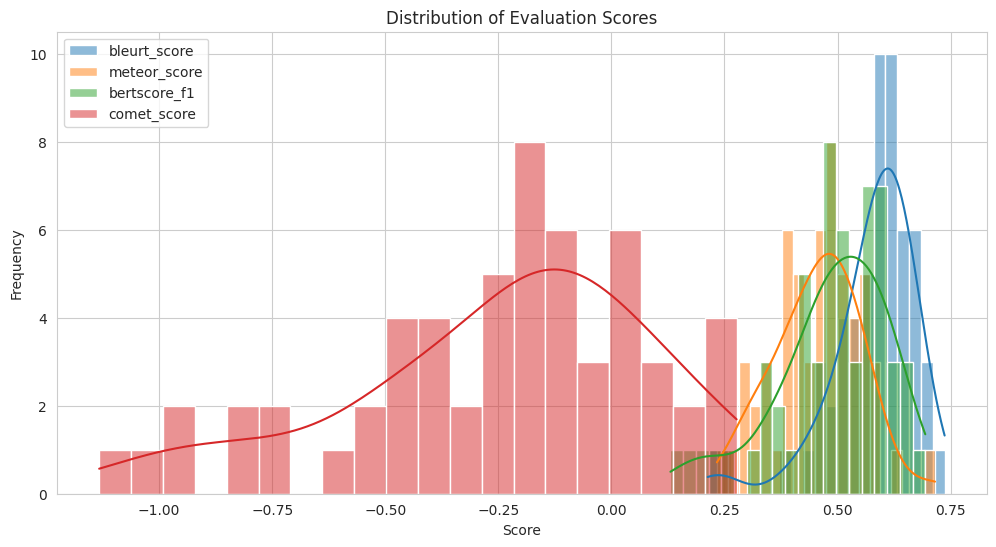

<ipython-input-26-ea62920ff5ab>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Metric", y="Score", data=df_melted, palette="Set2")


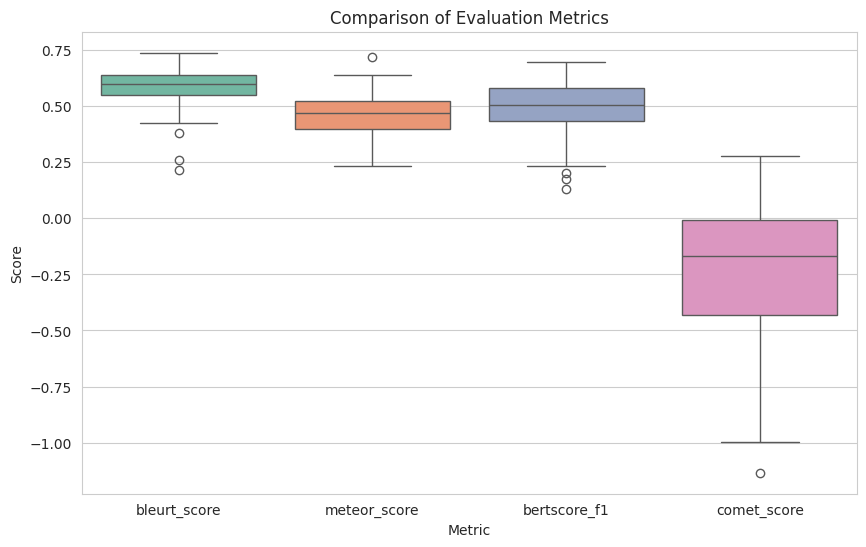

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file
csv_path = "/content/bleurt/predicted_narratives_with_all_metrics.csv"  # Update if needed
df = pd.read_csv(csv_path)

# Display the first few rows to confirm loading
df.head()

# Set the style
sns.set_style("whitegrid")

# Create a figure for multiple histograms
plt.figure(figsize=(12, 6))

# Plot distribution of all metrics
metrics = ["bleurt_score", "meteor_score", "bertscore_f1", "comet_score"]
for metric in metrics:
    sns.histplot(df[metric], kde=True, label=metric, bins=20)

plt.title("Distribution of Evaluation Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Melt dataframe for visualization
df_melted = df.melt(value_vars=metrics, var_name="Metric", value_name="Score")

# Plot a box plot to compare score distributions
sns.boxplot(x="Metric", y="Score", data=df_melted, palette="Set2")

plt.title("Comparison of Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()


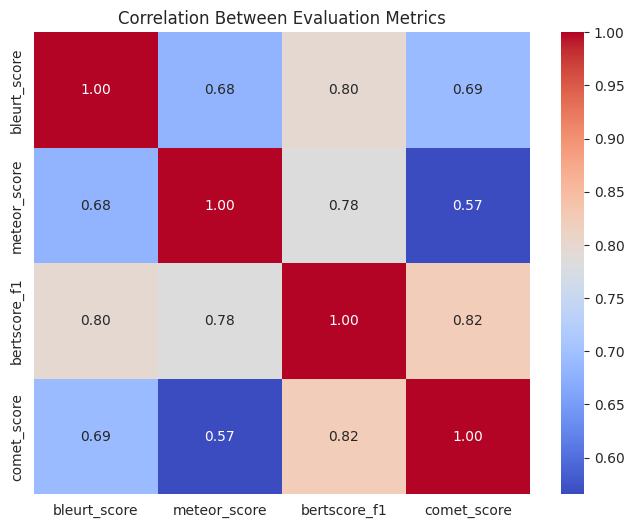

In [ ]:
plt.figure(figsize=(8, 6))

# Compute correlation matrix
corr_matrix = df[metrics].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between Evaluation Metrics")
plt.show()


### The Below cells are OLD T5 Code used to train and evaluate just on BLUERT, Keeping them here for reference and also I have displayed the old output table for better visual where you can see full narrativs.

In [ ]:
import pandas as pd
import ast
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq,
)
import torch
from collections import Counter

# Install and import BLEURT
from bleurt import score

# Load the original dataset
file_path = '/content/drive/MyDrive/InstructAware/metrics_Colab/Narrative_dataset_File.csv'
data = pd.read_csv(file_path)

# Step 1: Normalize bounding boxes
def normalize_bbox(bbox, image_width=2880, image_height=1800):
    """Normalize bounding box coordinates to range [0, 1]."""
    bbox = ast.literal_eval(bbox)  # Convert string to list
    x_min, y_min, x_max, y_max = bbox
    return [
        x_min / image_width,
        y_min / image_height,
        (x_max - x_min) / image_width,
        (y_max - y_min) / image_height,
    ]

data['Normalized BBox'] = data['Bounding Box'].apply(normalize_bbox)

# Step 2: Group data by `Original Filename`
grouped_data = data.groupby('Original Filename').agg({
    'OCR TEXT': lambda x: list(x),
    'Normalized BBox': lambda x: list(x),
    'Narrative 1': 'first',  # Assuming all rows for a file have the same narrative
}).reset_index()

# Step 3: Create Input Text for T5
def create_input_text(row):
    """Combine OCR text and bounding boxes into input format."""
    ocr_bbox_pairs = [
        f'"{ocr}": {bbox}' for ocr, bbox in zip(row['OCR TEXT'], row['Normalized BBox'])
    ]
    return f"OCR-BBox Pairs: {{ {', '.join(ocr_bbox_pairs)} }}"

grouped_data['input_text'] = grouped_data.apply(create_input_text, axis=1)

# Step 4: Use Narrative as the Output Text
grouped_data['output_text'] = grouped_data['Narrative 1']

# Step 5: Filter valid rows (Remove NaN outputs)
grouped_data = grouped_data.dropna(subset=['output_text'])

# Step 6: Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(grouped_data[['input_text', 'output_text']])
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

# Tokenization
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def preprocess_function(examples):
    inputs = tokenizer(
        examples['input_text'], max_length=512, truncation=True, padding="max_length"
    )
    outputs = tokenizer(
        examples['output_text'], max_length=128, truncation=True, padding="max_length"
    )
    inputs['labels'] = outputs['input_ids']
    return inputs

# Apply tokenization
tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

# Fine-Tuning T5
model = T5ForConditionalGeneration.from_pretrained("t5-base")
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-finetuned",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=4,  # Optimized for T4 GPU
    per_device_eval_batch_size=4,  # Optimized for T4 GPU
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,  # Adjust based on dataset size
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=50,
    fp16=True,  # Enable mixed precision for memory optimization
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Save the model and tokenizer
model.save_pretrained('./t5-finetuned')
tokenizer.save_pretrained('./t5-finetuned')

# Example prediction
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def predict_all(dataset, model, tokenizer):
    predictions = []
    for sample in dataset:
        input_text = sample['input_text']
        tokenized_input = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
        tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}
        outputs = model.generate(tokenized_input["input_ids"], max_length=128, num_beams=5, early_stopping=True)
        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append({"input_text": input_text, "predicted_narrative": predicted_text, "output_text": sample['output_text']})
    return predictions

# Predict for all test samples
test_predictions = predict_all(hf_dataset['test'], model, tokenizer)

# Save predictions to a CSV
predictions_df = pd.DataFrame(test_predictions)
predictions_df.to_csv("predicted_narratives.csv", index=False)

print("Predictions saved to predicted_narratives.csv")

# BLEURT Evaluation
bleurt_checkpoint = "bleurt-base-128"
scorer = score.BleurtScorer(bleurt_checkpoint)

# Calculate BLEURT scores
predictions_df['bleurt_score'] = scorer.score(references=predictions_df['output_text'].tolist(),
                                              candidates=predictions_df['predicted_narrative'].tolist())

# Save BLEURT results
predictions_df.to_csv("predicted_narratives_with_bleurt.csv", index=False)
print("Predictions with BLEURT scores saved to predicted_narratives_with_bleurt.csv")


Map:   0%|          | 0/231 [00:00<?, ? examples/s]

Map:   0%|          | 0/58 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-57-4a29a7e59437>:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Predictions saved to predicted_narratives.csv
Predictions with BLEURT scores saved to predicted_narratives_with_bleurt.csv


In [ ]:
predictions_df

input_text  \
0   OCR-BBox Pairs: { "TURGEON RAINE IEWELERS": [0...   
1   OCR-BBox Pairs: { "SCHOOL SPEED LIMIT 20": [0....   
2   OCR-BBox Pairs: { "error": [0.9680555555555556...   
3   OCR-BBox Pairs: { "Carsons": [0.07708333333333...   
4   OCR-BBox Pairs: { "VANS": [0.715625, 0.2527777...   
5   OCR-BBox Pairs: { "RETAIL/RESTAURANT OPPORTUNI...   
6   OCR-BBox Pairs: { "KRONER Dry Cleaners Since 1...   
7   OCR-BBox Pairs: { "ONE FINANCIAL PLAZA": [0.14...   
8   OCR-BBox Pairs: { "Grand": [0.1822916666666666...   
9   OCR-BBox Pairs: { "TUESDAY 2PC 4.99 OPCBUNDLE ...   
10  OCR-BBox Pairs: { "BY ORDER OF CITY OF CAMBRID...   
11  OCR-BBox Pairs: { "Roune Table": [0.7920138888...   
12  OCR-BBox Pairs: { "MEDITATION CLASSES": [0.287...   
13  OCR-BBox Pairs: { "VICTORIA COURT SHOPS-RESTAU...   
14  OCR-BBox Pairs: { "PUBLIC PARKING": [0.4614583...   
15  OCR-BBox Pairs: { "CHARLES ST": [0.17569444444...   
16  OCR-BBox Pairs: { "WELLS FARGO ATM": [0.413194...   
17  OCR-BBox Pairs: { "BABA'S MARKETPLACE": [0.445...   
18  OCR-BBox Pairs: { "error": [0.0100694444444444...   
19  OCR-BBox Pairs: { "LATINO MARKET RESTAURANT IN...   
20  OCR-BBox Pairs: { "campus": [0.292361111111111...   
21  OCR-BBox Pairs: { "COFFEE CO": [0.446527777777...   
22  OCR-BBox Pairs: { "RIGHT LANE ENDS EXCEPT 4w-3...   
23  OCR-BBox Pairs: { "LA FINE MEN'S SHOP 1394 SUI...   
24  OCR-BBox Pairs: { "OILCHANGES 19 FREE SSISTANC...   
25  OCR-BBox Pairs: { "PEREEC STRAACERS": [0.43680...   
26  OCR-BBox Pairs: { "TURNING VEHICLES": [0.35729...   
27  OCR-BBox Pairs: { "Error": [0.8993055555555556...   
28  OCR-BBox Pairs: { "Nandos": [0.394791666666666...   
29  OCR-BBox Pairs: { "TRUIST": [0.421180555555555...   
30  OCR-BBox Pairs: { "Google discovery+ START YOU...   
31  OCR-BBox Pairs: { "WRONG WAY": [0.152777777777...   
32  OCR-BBox Pairs: { "SOUTH RIRD": [0.71388888888...   
33  OCR-BBox Pairs: { "BEST BUY": [0.3079861111111...   
34  OCR-BBox Pairs: { "Error": [0.6010416666666667...   
35  OCR-BBox Pairs: { "SPEED LIMIT 25": [0.1961805...   
36  OCR-BBox Pairs: { "petco": [0.5631944444444444...   
37  OCR-BBox Pairs: { "NOSTOPPING ANY TIME": [0.37...   
38  OCR-BBox Pairs: { "teves AUTO SERVICE": [0.020...   
39  OCR-BBox Pairs: { "Elect Paul CHASSE New Bedfo...   
40  OCR-BBox Pairs: { "Spolidoro PLUMBING-HEATING-...   
41  OCR-BBox Pairs: { "BROWNED COOKIES": [0.785069...   
42  OCR-BBox Pairs: { "PARKING ONLY MINIMUM FINE $...   
43  OCR-BBox Pairs: { "TOBENER RAVENSCROFT LLP TEN...   
44  OCR-BBox Pairs: { "NONA PARIS": [0.6, 0.273888...   
45  OCR-BBox Pairs: { "STOP": [0.17916666666666667...   
46  OCR-BBox Pairs: { "ENTRANCE": [0.2166666666666...   
47  OCR-BBox Pairs: { "AXION TAX & BEYOND (510)342...   
48  OCR-BBox Pairs: { "HEART PFITNES": [0.02256944...   
49  OCR-BBox Pairs: { "RetailMeNot": [0.5809027777...   
50  OCR-BBox Pairs: { "SPRING SCAFFOLDING REACHING...   
51  OCR-BBox Pairs: { "ROSEHOUSI ALON": [0.5670138...   
52  OCR-BBox Pairs: { "PHARMACY": [0.0409722222222...   
53  OCR-BBox Pairs: { "ChumLees": [0.3767361111111...   
54  OCR-BBox Pairs: { "WATCH CHILDREN SCHOOL ZONE ...   
55  OCR-BBox Pairs: { "675 WEST KENDAL STREET": [0...   
56  OCR-BBox Pairs: { "STAIRS COT TOVER": [0.18055...   
57  OCR-BBox Pairs: { "EC MECHANICAL East Coast Me...   

                                  predicted_narrative  \
0   1. In the center of your view, you will see a ...   
1   1. In the center of your view, you will see a ...   
2   1. In the center of your view, you will see a ...   
3   1. In the center of your view, there is a prom...   
4   1. To your left, you will see a prominent sign...   
5   1. In the center of your view, you will see a ...   
6   1. In the center of your view, you will see a ...   
7   1. To your left, you will see a prominent sign...   
8   1. In front of you, there is a prominent shop ...   
9   1. In front of you, there is a prominent shop ...   
10  1. In the center of your view, there is a prom..

In [ ]:
import pandas as pd

# Load the CSV file
csv_path = "/content/drive/MyDrive/InstructAware/metrics_Colab/Copy of predicted_narratives_with_bleurt.csv"  # Update the path if needed
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

from google.colab import data_table

# Display CSV as an interactive table
data_table.DataTable(df)

### SBERT COSINE and USE Implementation

In [ ]:
import io
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from google.colab import files
from google.colab import data_table

# Prompt the user to upload an Excel file (downloaded from Google Sheets)
uploaded = files.upload()

# Retrieve the filename (assumes a single file upload)
filename = next(iter(uploaded.keys()))
print("Uploaded file:", filename)

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Ensure the requisite columns are present in the DataFrame
required_columns = {'predicted_narrative', 'output_text'}
if not required_columns.issubset(df.columns):
    raise ValueError("The uploaded file must contain the columns 'predicted_narrative' and 'output_text'.")

# Instantiate the SBERT model (here, 'all-MiniLM-L6-v2' is employed as an exemplar)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract the textual data from the designated columns
narratives = df['predicted_narrative'].tolist()
outputs = df['output_text'].tolist()

# Batch encode the texts into high-dimensional tensor representations
embeddings_narratives = model.encode(narratives, convert_to_tensor=True)
embeddings_outputs = model.encode(outputs, convert_to_tensor=True)

# Compute the cosine similarity matrix between the two sets of embeddings
cosine_scores_matrix = util.cos_sim(embeddings_narratives, embeddings_outputs)

# Extract the diagonal of the cosine similarity matrix, which corresponds to pairwise scores,
# and assign these scores to a new column labeled "sbert+cosine"
df['sbert+cosine'] = cosine_scores_matrix.diag().tolist()

# Enable Colab's interactive DataFrame display
data_table.enable_dataframe_formatter()

# Display the augmented DataFrame as an interactive table
display(df)

Saving new_Predicted_narratives_with_all_metrics.xlsx to new_Predicted_narratives_with_all_metrics (5).xlsx
Uploaded file: new_Predicted_narratives_with_all_metrics (5).xlsx


input_text  \
0   OCR-BBox Pairs: { "VICTORIA COURT SHOPS-RESTAU...   
1   OCR-BBox Pairs: { "Amc": [0.5263888888888889, ...   
2   OCR-BBox Pairs: { "LALO": [0.809375, 0.4477777...   
3   OCR-BBox Pairs: { "SERVICEDR. ONE WAY": [0.308...   
4   OCR-BBox Pairs: { "DAISY": [0.0263888888888888...   
5   OCR-BBox Pairs: { "MORTON'S": [0.3256944444444...   
6   OCR-BBox Pairs: { "CHIROPRACTIO": [0.001388888...   
7   OCR-BBox Pairs: { "teves AUTO SERVICE": [0.020...   
8   OCR-BBox Pairs: { "EBOULANGERIE": [0.865625, 0...   
9   OCR-BBox Pairs: { "HIDDEN DRIVEWAY ONE WAY NO ...   
10  OCR-BBox Pairs: { "TENEMOS ESPINAZO- RPADE CRA...   
11  OCR-BBox Pairs: { "HOT DOGS BURGERS FRIES": [0...   
12  OCR-BBox Pairs: { "LIMI 25": [0.60590277777777...   
13  OCR-BBox Pairs: { "COFFEE CO": [0.446527777777...   
14  OCR-BBox Pairs: { "DO NOT ENTER": [0.807291666...   
15  OCR-BBox Pairs: { "USE CROSSWALK": [0.25208333...   
16  OCR-BBox Pairs: { "LONDON": [0.097916666666666...   
17  OCR-BBox Pairs: { "NO ACCESS To ROUTE 28": [0....   
18  OCR-BBox Pairs: { "Shaws Osco PHARMACY": [0.64...   
19  OCR-BBox Pairs: { "PRIME URBAN RETAIL/OFFICE F...   
20  OCR-BBox Pairs: { "Panasonic": [0.276388888888...   
21  OCR-BBox Pairs: { "1 WEN'S YUNNAN NOODLE & RAM...   
22  OCR-BBox Pairs: { "Error": [0.5097222222222222...   
23  OCR-BBox Pairs: { "Staples": [0.11909722222222...   
24  OCR-BBox Pairs: { "Error": [0.8399305555555555...   
25  OCR-BBox Pairs: { "TARGET": [0.073958333333333...   
26  OCR-BBox Pairs: { "Clean Harbors": [0.39895833...   
27  OCR-BBox Pairs: { "sneakerama FOR THE LONG RUN...   
28  OCR-BBox Pairs: { "MALVIN BARBER": [0.14513888...   
29  OCR-BBox Pairs: { "POWERLIFTING +50SPECIALTY B...   
30  OCR-BBox Pairs: { "AMBER ROAD BAR & GRILLE": [...   
31  OCR-BBox Pairs: { "Error": [0.3920138888888889...   
32  OCR-BBox Pairs: { "Zen-Gardens": [0.5614583333...   
33  OCR-BBox Pairs: { "HALFDOSE": [0.5829861111111...   
34  OCR-BBox Pairs: { "HARVEST AFRICAN MARKET": [0...   
35  OCR-BBox Pairs: { "Neighbor Works HOUSING SOLU...   
36  OCR-BBox Pairs: { "IICKPIN": [0.22777777777777...   
37  OCR-BBox Pairs: { "BUCKLEY INSURANCE AGENCY, I...   
38  OCR-BBox Pairs: { "coda BAR+KITCHEN": [0.50208...   
39  OCR-BBox Pairs: { "Error": [0.0, 0.44777777777...   
40  OCR-BBox Pairs: { "RESTAURANT DESFINA BAR OAO ...   
41  OCR-BBox Pairs: { "TRUIST": [0.421180555555555...   
42  OCR-BBox Pairs: { "1A1 TREMONT": [0.0020833333...   
43  OCR-BBox Pairs: { "THE VALT": [0.6673611111111...   
44  OCR-BBox Pairs: { "DANGEROUS INTERSECTION AHEA...   
45  OCR-BBox Pairs: { "FARHI": [0.1892361111111111...   
46  OCR-BBox Pairs: { "MARKET": [0.539583333333333...   
47  OCR-BBox Pairs: { "BABA'S MARKETPLACE": [0.445...   
48  OCR-BBox Pairs: { "AXION TAX & BEYOND (510)342...   
49  OCR-BBox Pairs: { "Universal Insurance AGENCY"...   
50  OCR-BBox Pairs: { "RobRoy hair salon": [0.7604...   
51  OCR-BBox Pairs: { "Oxford St to Horton St": [0...   
52  OCR-BBox Pairs: { "WINE Bar": [0.6565972222222...   
53  OCR-BBox Pairs: { "PARADISE PUE": [0.039236111...   
54  OCR-BBox Pairs: { "wicked sisters": [0.06875, ...   
55  OCR-BBox Pairs: { "PARKING ONLY MINIMUM FINE $...   
56  OCR-BBox Pairs: { "RIGHT LANE ENDS EXCEPT 4w-3...   
57  OCR-BBox Pairs: { "Harcourts": [0.030208333333...   

                                  predicted_narrative  \
0   1. In the center of your view, you will see a ...   
1   1. In front of you, there is a prominent shop ...   
2   1. To your left, you will see a prominent sign...   
3   1. In the center of your view, you will see a ...   
4   1. In front of you, there is a prominent shop ...   
5   1. In the center of your view, you will see a ...   
6   1. In the center of your view, there is a prom...   
7   1. In the center of your view, there is a prom...   
8   1. In the center of your view, you will see a ...   
9   1. In the center of your view, you will see a ...   
10  1. In the center of your view, you will see a ..

In [ ]:
pip install summ-eval

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.2 MB/s eta 0:00:00
 

In [ ]:
!git clone https://github.com/google-research/bleurt.git
%cd bleurt
!pip install .
!wget https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip
!unzip BLEURT-20.zip
!pip install datasets
!pip install tensorflow tensorflow-text
!pip install pandas scikit-learn
!pip install torch torchvision torchaudio


Cloning into 'bleurt'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 134 (delta 0), reused 17 (delta 0), pack-reused 116 (from 1)
Receiving objects: 100% (134/134), 31.28 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/bleurt
Processing /content/bleurt
  Preparing metadata (setup.py) ... done
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456764 sha256=035135eb59ad6e55afa4f1b5a1bcbd7e333f87ebee6254bb936c53b0d6c6c661
  Stored in directory: /tmp/pip-ephem-wheel-cache-pqhxwsdi/wheels/49/ab/73/9318ab38d4cd1c732bcea8335d3f8d7c0316c8d07b9084fa85
Successfully built BLEURT
--2025-02-06 01:18:11--  https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.

In [ ]:
# Install necessary libraries
!pip install nltk bert-score unbabel-comet sentence-transformers torch bleurt

!pip install nltk
import nltk
nltk.download('wordnet')


# Download necessary resources again
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')  # Optional but sometimes required

# Also, try downloading 'punkt_tab' directly if needed
try:
    nltk.download('punkt_tab')
except:
    print("punkt_tab not found, proceeding without it.")

from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize


# Import required libraries
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
from scipy.spatial.distance import cosine
from bleurt import score as bleurt_score
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from bert_score import score as bert_score
from comet.models import download_model, load_from_checkpoint




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 37.3 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:

# Load the dataset
csv_file_path = "/content/drive/MyDrive/InstructAware/Code/Option1TransformerSimpleFromScratch/New_Result/predictions_with_metrics.csv"  # Update with your file path
predictions_df = pd.read_csv(csv_file_path)

# Initialize BLEURT scorer
bleurt_checkpoint = "BLEURT-20"  # Ensure BLEURT model is available
bleurt_scorer = bleurt_score.BleurtScorer(bleurt_checkpoint)

predictions_df['Output Narrative'] = predictions_df['Output Narrative'].fillna("").astype(str)
predictions_df['Predicted Narrative'] = predictions_df['Predicted Narrative'].fillna("").astype(str)

# Compute BLEURT scores safely
predictions_df['bleurt_score'] = bleurt_scorer.score(
    references=predictions_df['Output Narrative'].tolist(),
    candidates=predictions_df['Predicted Narrative'].tolist()
)

# Compute METEOR scores
predictions_df['meteor_score'] = predictions_df.apply(
    lambda row: meteor_score(
        [word_tokenize(row['Output Narrative'])],  # Reference (tokenized)
        word_tokenize(row['Predicted Narrative'])  # Hypothesis (tokenized)
    ),
    axis=1
)

# Compute BERTScore
P, R, F1 = bert_score(
    predictions_df['Predicted Narrative'].tolist(),
    predictions_df['Output Narrative'].tolist(),
    lang="en",
    rescale_with_baseline=True
)
predictions_df['bertscore_f1'] = F1.tolist()

# Compute SBERT+Cosine similarity
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def compute_sbert_cosine(row):
    embedding1 = sbert_model.encode(row['Predicted Narrative'], convert_to_tensor=True)
    embedding2 = sbert_model.encode(row['Output Narrative'], convert_to_tensor=True)
    return util.pytorch_cos_sim(embedding1, embedding2).item()

predictions_df['sbert_cosine'] = predictions_df.apply(compute_sbert_cosine, axis=1)

### **🔹 Compute USE (Universal Sentence Encoder) Similarity**
# Load USE model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def compute_use_similarity(row):
    """
    Computes cosine similarity between USE embeddings of two sentences.
    """
    embeddings = use_model([row['Predicted Narrative'], row['Output Narrative']])
    emb1, emb2 = np.array(embeddings[0]), np.array(embeddings[1])
    return 1 - cosine(emb1, emb2)

predictions_df['use_similarity'] = predictions_df.apply(compute_use_similarity, axis=1)

### **Compute COMET Scores**
# Download and load the COMET model
comet_model_path = download_model("Unbabel/wmt22-comet-da")  # Pre-trained model for evaluation
comet_model = load_from_checkpoint(comet_model_path)

# Prepare input data for COMET
comet_inputs = [
    {"src": "", "mt": pred, "ref": ref}
    for pred, ref in zip(predictions_df["Predicted Narrative"], predictions_df["Output Narrative"])
]

# Compute COMET scores
comet_scores = comet_model.predict(comet_inputs, batch_size=8)
predictions_df["comet_score"] = comet_scores["scores"]

### **Save Final Dataset with All Metrics**
output_csv_path = "predictions_with_metrics.csv"
predictions_df.to_csv(output_csv_path, index=False)

print(f"✅ Predictions with all metrics saved to {output_csv_path}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 148/148 [02:01<00:00,  1.22it/s]


✅ Predictions with all metrics saved to predictions_with_metrics.csv


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = "/content/bleurt/predictions_with_metrics.csv"  # Update the path if needed
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

from google.colab import data_table

# Display CSV as an interactive table
data_table.DataTable(df)